In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/dataset/train_avocado_1.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dataset/test_avocado_1.csv')

# Exclude columns starting with 'region_'
train_df = train_df.loc[:, ~train_df.columns.str.startswith('region_')]
test_df = test_df.loc[:, ~test_df.columns.str.startswith('region_')]


Preparing the data for modeling. This model is to be fit for all the columns except the region columns.

In [ ]:
X_train = train_df.drop(['AveragePrice'], axis=1)
y_train = train_df['AveragePrice']
X_test = test_df.drop(['AveragePrice'], axis=1)
y_test = test_df['AveragePrice']

**Fitting a linear model:**

Fitting a linear regression model using sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Evaluation:**

evaluating  the the linear regression model by making the model predict the average price in the test file.

evaluation metrics:

1) R-squared (R²): This metric provides a measure of how well the independent variables explain the variability of the dependent variable. It is a proportion that ranges from 0 to 1, with higher values indicating a better fit. An R² of 1 suggests that the model explains all the variability of the dependent variable.

2) Mean Squared Error (MSE): This metric measures the average of the squares of the errors, which are the differences between the observed actual outcomes and the predictions made by the model. Lower values of MSE indicate a better fit.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print('Train R-squared:', r2_score(y_train, y_pred_train))
print('Test R-squared:', r2_score(y_test, y_pred_test))
print('Train MSE:', mean_squared_error(y_train, y_pred_train))
print('Test MSE:', mean_squared_error(y_test, y_pred_test))

Train R-squared: 0.4575247688554045
Test R-squared: 0.45478900072460704
Train MSE: 0.08464743919080651
Test MSE: 0.08586130894627646


**Detailed Summary:**

getting a detailed summary of the model using statsmodel summary.

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1230.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:18:05   Log-Likelihood:                -2690.7
No. Observations:               14599   AIC:                             5403.
Df Residuals:                   14588   BIC:                             5487.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4011      0.002    581.661   

**Interpretation:**

1)The model is statistically significant overall, as shown by the F-statistic and its associated probability.

2) The R-squared and adjusted R-squared values indicate that the model explains a moderate proportion of the variance in AveragePrice, but there's still a good portion left unexplained, which could be due to factors not included in the model or to inherent variability in the data.

3) The model does not overfit as both R-squared values are similar.

4) AIC and BIC values can be used to compare this model's performance with other models' performances on the same dataset. The model with the lowest AIC and BIC should be preferred all else being equal.

# **Improving the model:**

The model can be improved by selecting only the columns that affect the dependent variable (average price). To select those columns we will be using 3 methods:

(1) Scatter plot analysis: scatter plots of independent versus dependent variable.

(2) Correlation Matrix Analysis: using the correlation matrix to find the correlation of all the independent variables againt the dependent variable.

(3) Statsmodels OLS summary: using the OLS summary to find the significant variable based on p-value < 0.05

In [ ]:
# Separate the features and the target variable for training data
X_train = train_df.drop('AveragePrice', axis=1)
y_train = train_df['AveragePrice']


**(1) Scatter plot:**

When interpreting the correlation between an independent variable and a dependent variable using scatter plots, the key points are:

1. **Trend Direction**: Positive correlation if upward trend, negative if downward.
2. **Strength of Relationship**: Closer points to a line indicate a stronger correlation.
3. **Linearity and Non-Linearity**: Look for straight (linear) or curved (non-linear) patterns.
4. **Outliers**: Identify points far from the general trend, which may influence the correlation.
5. **Quantitative Measures**: Complement scatter plot observations with correlation coefficients for precise interpretation.

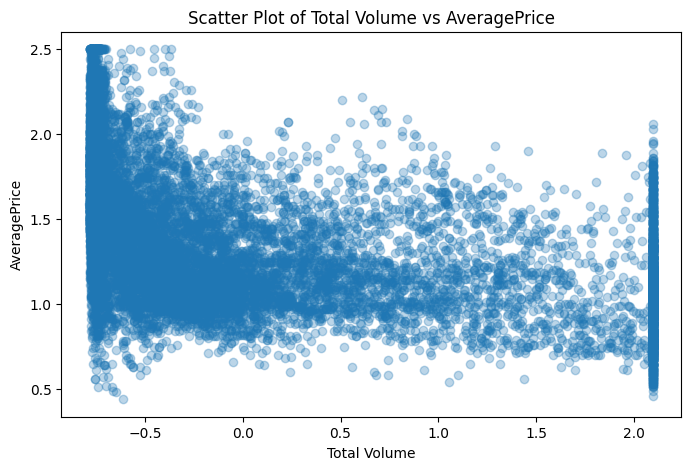

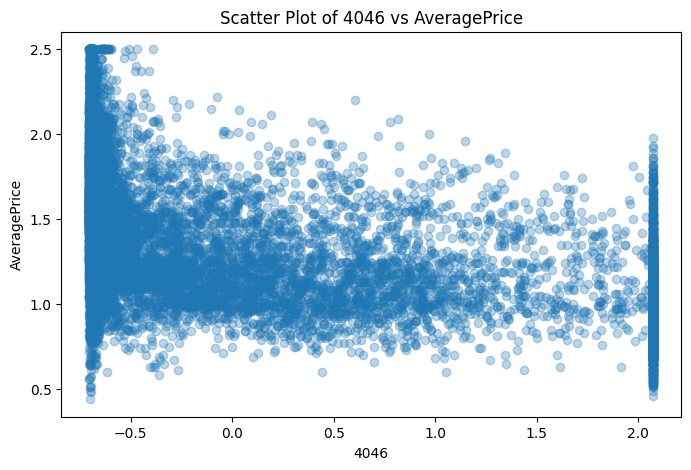

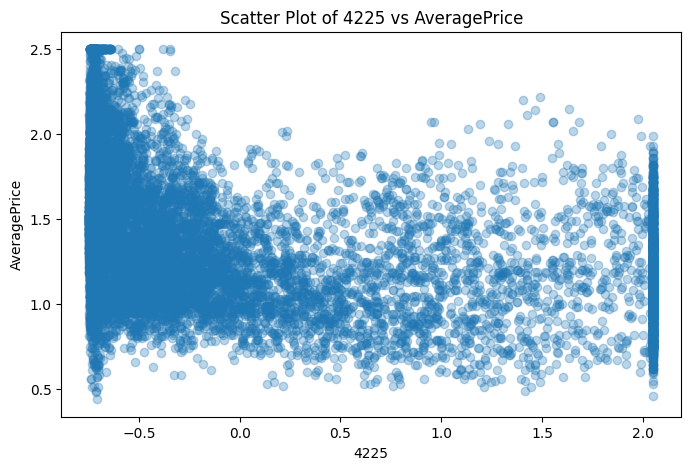

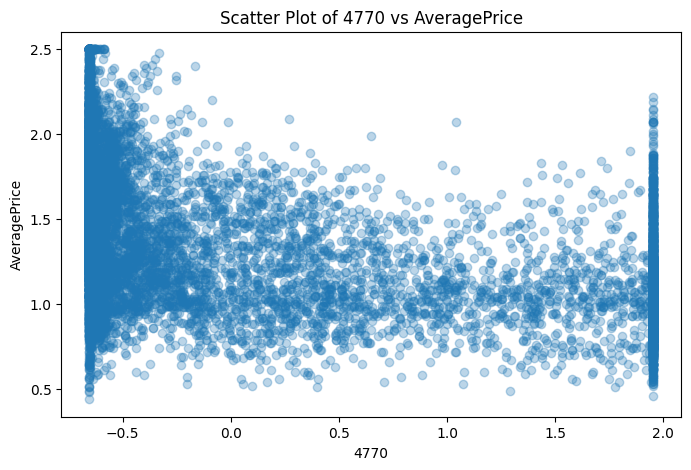

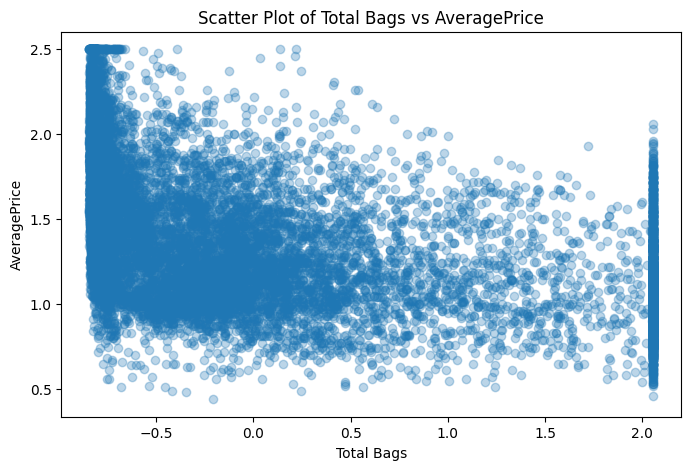

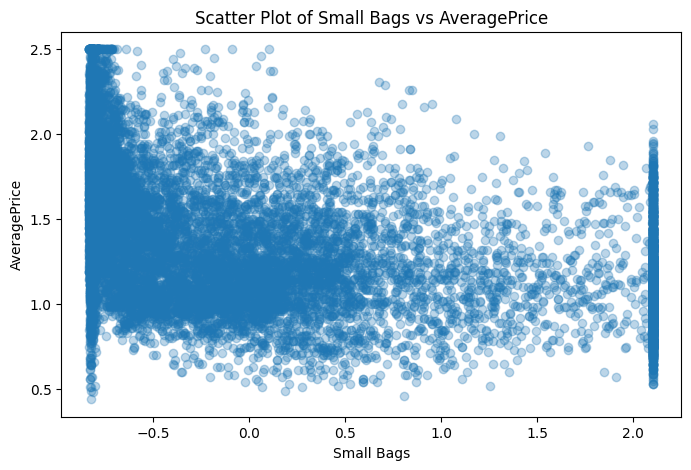

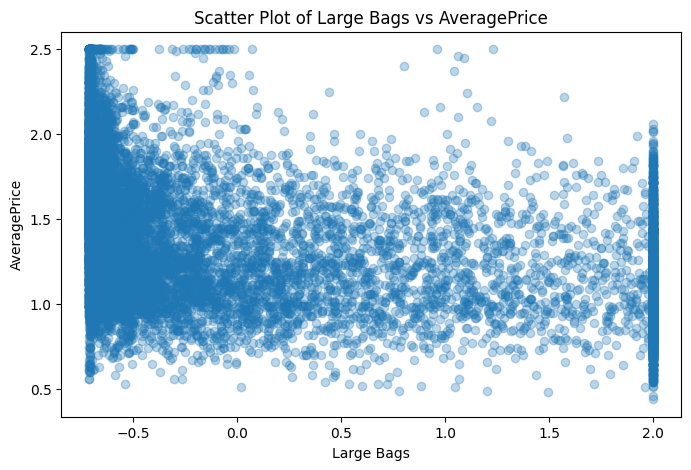

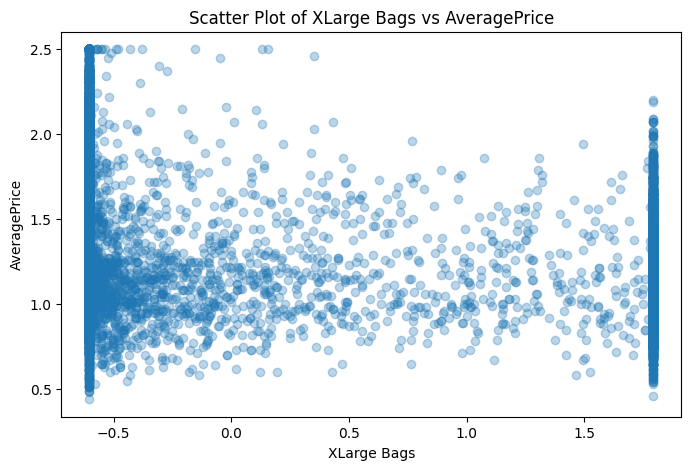

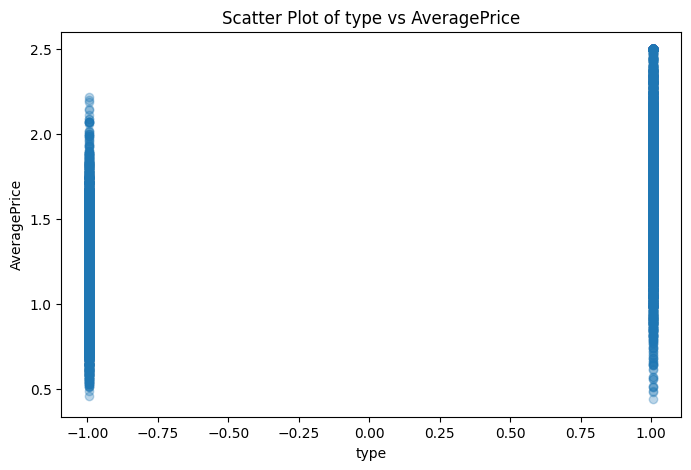

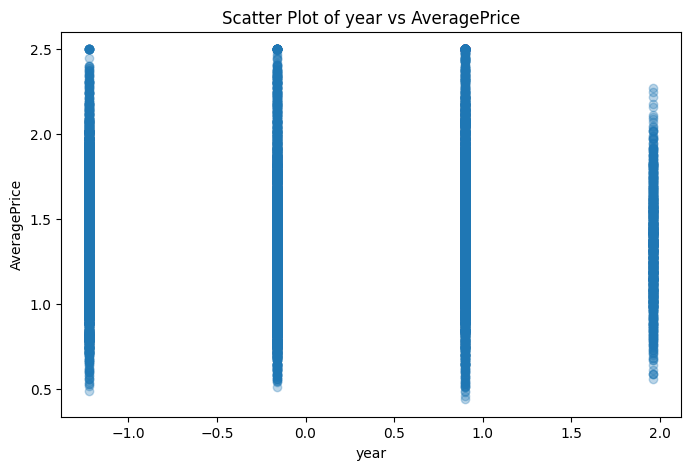

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined as shown
# Iterate over each independent variable to plot it against 'AveragePrice'
for column in X_train.columns:
    plt.figure(figsize=(8, 5))  # Set the figure size for better readability
    plt.scatter(X_train[column], y_train, alpha=0.3)  # Plot scatter plot of independent variable vs. AveragePrice
    plt.title(f'Scatter Plot of {column} vs AveragePrice')  # Title with the name of the independent variable
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel('AveragePrice')  # Label for the y-axis
    plt.show()  # Show the plot

**(2) Correlation matrix analysis**

To find an appropriate threshold for selecting highly correlated variables both positively and negatively with the target variable AveragePrice, you can use different methods. One approach is to look at the distribution of the correlation coefficients and select a cutoff based on a certain percentile. Here we choose variables that are above the 75th percentile in absolute value for positive correlation and below the 25th percentile for negative correlation.

In [ ]:
# Method 2: Correlation Matrix Analysis
correlation_matrix = train_df.corr()
correlation_with_target = correlation_matrix['AveragePrice'].sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('AveragePrice')
print("Correlation matrix:\n", correlation_with_target)

# Determine thresholds based on percentiles
# For positive correlations
positive_threshold = correlation_with_target[correlation_with_target > 0].quantile(0.75)
# For negative correlations
negative_threshold = correlation_with_target[correlation_with_target < 0].quantile(0.25)

# Select variables that are highly positively and negatively correlated based on these thresholds
highly_positively_correlated_vars = correlation_with_target[correlation_with_target > positive_threshold].index.tolist()
highly_negatively_correlated_vars = correlation_with_target[correlation_with_target < negative_threshold].index.tolist()

# Output the selected variables
print("Highly positively correlated variables:", highly_positively_correlated_vars)
print("Highly negatively correlated variables:", highly_negatively_correlated_vars)

Correlation matrix:
 type            0.620809
year            0.083122
XLarge Bags    -0.355762
4225           -0.411899
Large Bags     -0.431299
Small Bags     -0.450796
4770           -0.465613
Total Bags     -0.490958
Total Volume   -0.507533
4046           -0.530897
Name: AveragePrice, dtype: float64
Highly positively correlated variables: ['type']
Highly negatively correlated variables: ['Total Volume', '4046']


**Interpreting the scatter plots for the highly correlated variables:**

From the scatter plot of **Total Volume vs. AveragePrice:**

1. **Negative Correlation**: The data suggest a negative correlation; as Total Volume increases, AveragePrice tends to decrease.
2. **Moderate to Weak**: The relationship does not appear to be strong, as the data points are quite spread out.
3. **Possible Outliers**: The dense cluster on the right could represent outliers or a subgroup within the data.
4. **Non-Linear**: The relationship between Total Volume and AveragePrice does not appear to be strictly linear.


For the scatter plot of the **4046 variable against AveragePrice**:

1. **Negative Correlation**: The scatter plot indicates a negative correlation, where higher values of 4046 are associated with lower AveragePrice, but the pattern isn't strongly linear.
2. **Spread of Data**: The data points are widely spread, suggesting a moderate to weak correlation.
3. **Density**: There's a high density of data points near the origin, which implies that for lower values of 4046, the AveragePrice is more varied.
4. **Vertical Cluster**: Similar to the previous scatter plot, a vertical cluster at the higher end of the 4046 range suggests that for very high values, the AveragePrice does not decrease further, which could indicate a floor effect or that other factors might be influencing the price at this range.

For the scatter plot of the **type variable against AveragePrice**:

1. **Two Distinct Groups**: The plot shows two distinct vertical lines, which suggests that "type" is likely a categorical variable coded as 0 and 1, representing two types of avocados.
2. **Positive Correlation**: The existence of different average prices for the two types indicates that one type generally has higher prices than the other, consistent with the positive correlation coefficient.
3. **Price Range**: Each type has a range of prices, but the ranges do not overlap much, reinforcing the strong correlation between type and price.
4. **Variation Within Each Type**: There is variation in the price within each type, but this plot does not indicate what other factors might explain that variation.


**(3) Statsmodel OLS Summary:**

**Statistical Significance**: The p-value helps determine whether the relationship that the model has found is statistically significant, i.e., unlikely to have occurred by chance. This adds robustness to the feature selection process, as it uses a hypothesis testing framework to evaluate each feature.

**Interpretability**: The summary provided by statsmodels includes not just p-values, but also coefficients, standard errors, confidence intervals, and other diagnostics that give a comprehensive view of the model's performance and the relationships between variables.

**Feature Selection:** It allows you to choose the features that contribute meaningfully to the prediction of the dependent variable, helping to simplify the model and potentially improve performance by reducing overfitting.

In [ ]:
import statsmodels.api as sm

# Assuming X_train and y_train are already defined and preprocessed
X_train_sm = sm.add_constant(X_train)  # Adding a constant for the intercept
model = sm.OLS(y_train, X_train_sm).fit()

# Select significant variables based on p-value < 0.05
significant_vars = list(model.pvalues[model.pvalues < 0.01].index)
if 'const' in significant_vars:
    significant_vars.remove('const')  # Remove the constant

# Print the names of the significant variables and their p-values
print("Significant variables and their p-values:")
for var in significant_vars:
    print(f"{var}: p-value={model.pvalues[var]}")


Significant variables and their p-values:
Total Volume: p-value=5.610748409278654e-19
4046: p-value=0.0017918667459317528
4225: p-value=6.792433098846794e-57
4770: p-value=2.716428534805315e-29
Total Bags: p-value=2.5029574993017384e-14
Small Bags: p-value=8.641086250420455e-19
Large Bags: p-value=0.0007362160577896407
XLarge Bags: p-value=6.520784517780845e-14
type: p-value=0.0
year: p-value=4.4460296909923874e-48


**Chooosing the final variables:**

In [ ]:
# Combine lists from correlation analysis and OLS summary
final_vars = list(set(highly_positively_correlated_vars + highly_negatively_correlated_vars + significant_vars ))

print(final_vars)

['XLarge Bags', 'Large Bags', '4225', '4046', 'year', 'Small Bags', 'type', '4770', 'Total Bags', 'Total Volume']


**fitting a model with the selected variables:**

In [ ]:
# Fit a linear model using only the selected variables
X_train_final = X_train[final_vars]
X_test_final = X_test[final_vars]

lin_reg_final = LinearRegression()
lin_reg_final.fit(X_train_final, y_train)

LinearRegression()

**Predict and Calculate metrics for the new model:**

In [ ]:
# Predict and evaluate the final model using test data
y_pred_final = lin_reg_final.predict(X_test_final)

# Calculate metrics for the new model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f'New Final model MSE: {mse_final}')
print(f'New Final model R-squared: {r2_final}')

New Final model MSE: 0.08586130894627644
New Final model R-squared: 0.45478900072460715


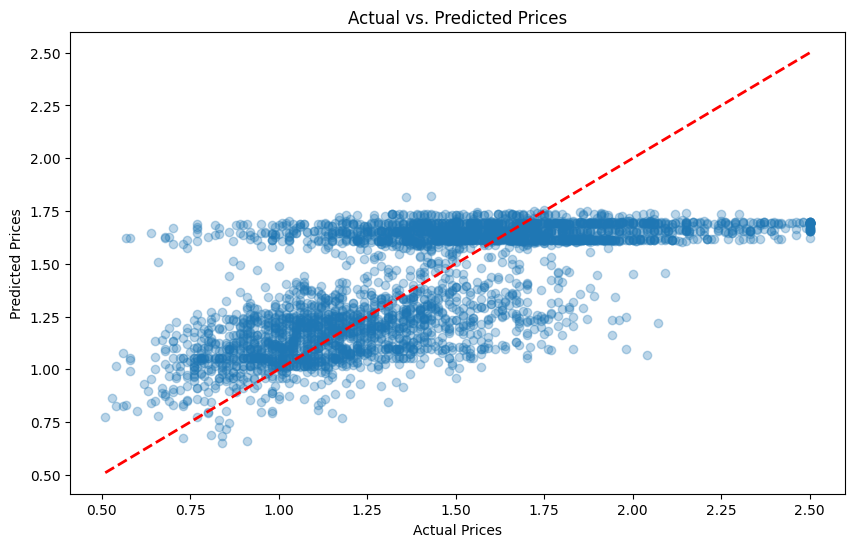

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.3)

# Plot a line of perfect prediction
min_val = min(y_test.min(), y_pred_final.min())
max_val = max(y_test.max(), y_pred_final.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# **Interpretation of the model**
From the scatter plot we can see the comparison of the actual values to the presicted values. from this scatter plot we can interpret the following:

(1) **Density of Points Near the Line:** There is a dense cluster of points around the red dashed line, especially for lower values, suggesting that for a significant number of observations, the model's predictions are close to the actual prices.

(2) **Dispersion**: As the actual prices increase, the predictions appear to be less accurate, with more dispersion around the red dashed line. This could indicate that the model is less capable of accurately predicting higher prices.

(3) **Bias**: The model seems to underestimate the actual prices that are higher and overestimate the lower prices since more points are below the line for higher actual prices and above the line for lower actual prices.

(4) **Overall Fit**: The general trend seems to follow the line of perfect prediction, but not tightly, indicating a moderate fit.

(5) **Line of Perfect Prediction**: The red dashed line represents the 'ideal' situation where the predicted prices would match the actual prices exactly. The degree to which the data points diverge from this line represents the error in the model's predictions.
